# 2 agents, comparison strict self play - loose self play

In [1]:
USERNAME = "299011-unimore"
PROJECT_STRICT = "gridworld_strictplay_2agents"
PROJECT_LOOSE = "gridworld_looseplay_2agents"

In [2]:
import wandb

api = wandb.Api()
project_path = f"{USERNAME}/{PROJECT_STRICT}"
runs = api.runs(project_path)
print(f"Found {len(runs)} runs of project {PROJECT_STRICT}".center(100, '='))

import pandas as pd

dfs = []
for run in runs:
    history = run.history(keys=["Episodes", "Testing_steps_per_episode", "Testing_success_rate_per_episode", "Testing_reward_per_episode"])  # scegli le metriche che ti interessano
    history["run_name"] = run.name
    history["run_group"] = run.group
    dfs.append(history)

all_runs_strict = pd.concat(dfs, ignore_index=True)

print(f"Runs succesfully concatenated")


project_path = f"{USERNAME}/{PROJECT_LOOSE}"
runs = api.runs(project_path)
print(f"Found {len(runs)} runs of project {PROJECT_LOOSE}".center(100, '='))

import pandas as pd

dfs = []
for run in runs:
    history = run.history(keys=["Episodes", "Testing_steps_per_episode", "Testing_success_rate_per_episode", "Testing_reward_per_episode"])  # scegli le metriche che ti interessano
    history["run_name"] = run.name
    history["run_group"] = run.group
    dfs.append(history)

all_runs_losse = pd.concat(dfs, ignore_index=True)
print(f"Runs succesfully concatenated")


========================Found 9 runs of project gridworld_strictplay_2agents========================
Runs succesfully concatenated
========================Found 6 runs of project gridworld_looseplay_2agents=========================
Runs succesfully concatenated


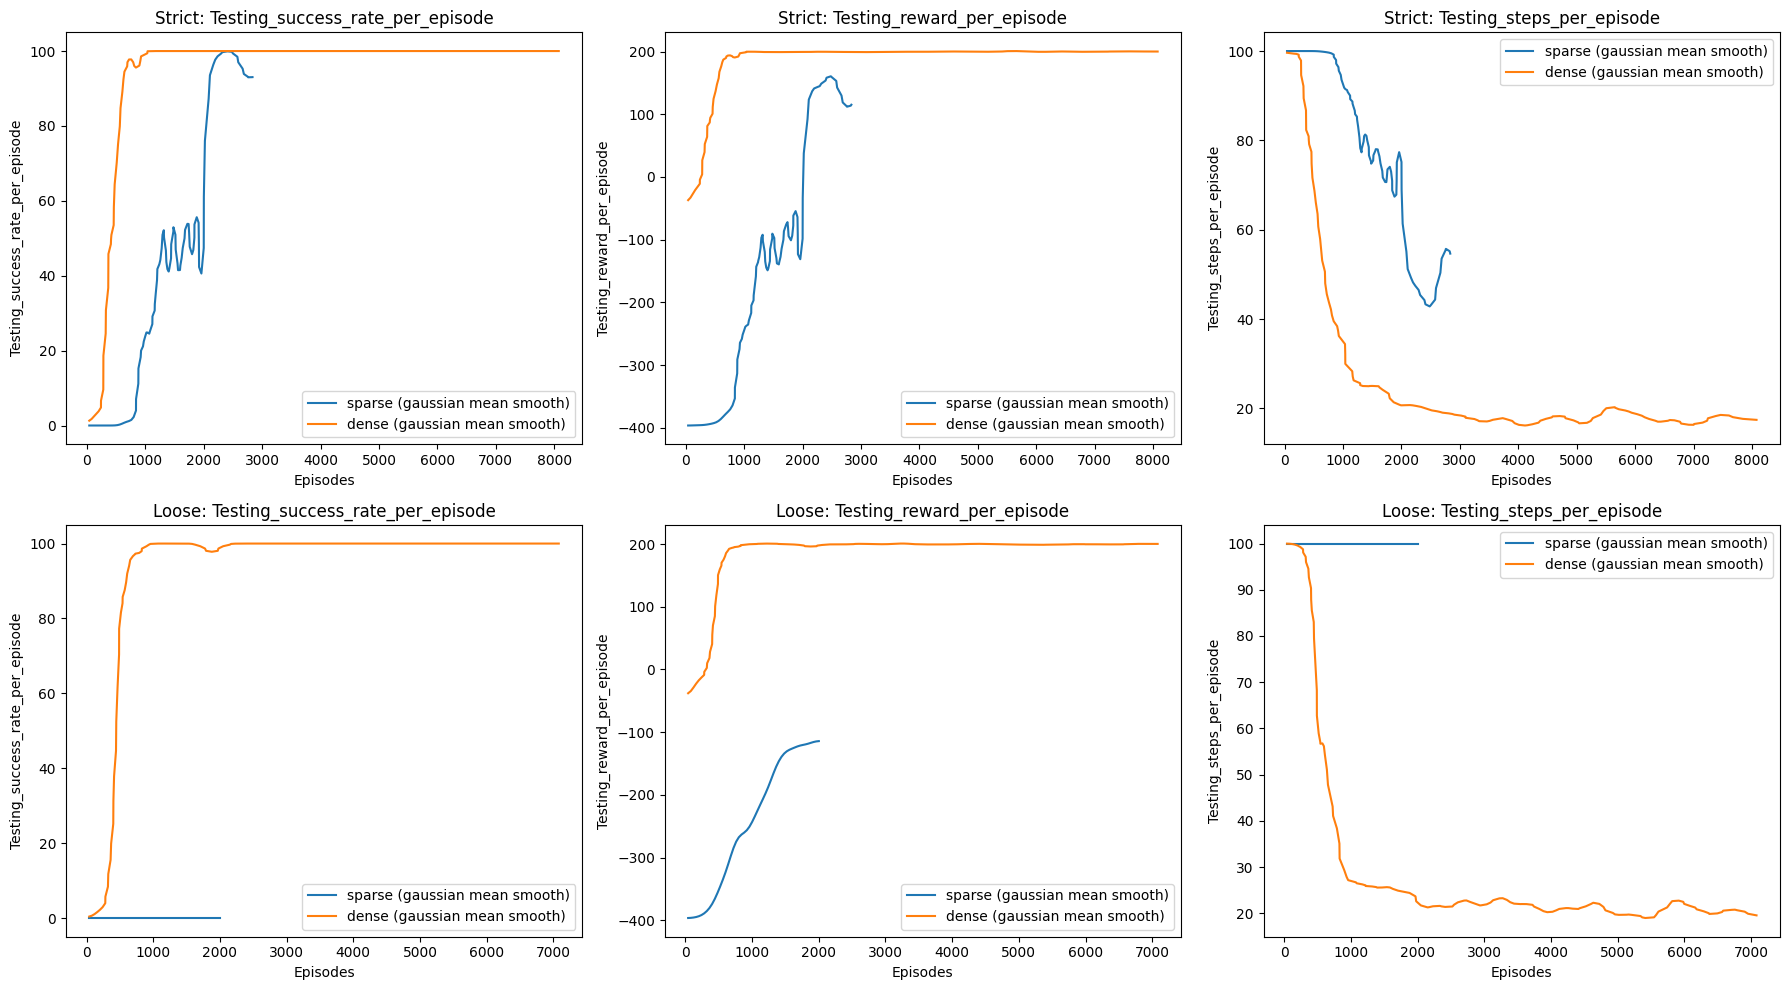

In [3]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

sigma = 2   # Gaussian smooth
metrics = ["Testing_success_rate_per_episode", "Testing_reward_per_episode", "Testing_steps_per_episode"]

fig, axes = plt.subplots(2, 3, figsize=(18,10)) 

# --- Row 1: strict ---
groups = ["sparse", "dense"]
for i, metric in enumerate(metrics):
    ax = axes[0, i]
    for group_name in groups:
        group_df = all_runs_strict[all_runs_strict["run_group"] == group_name]
        mean_per_episode = group_df.groupby("Episodes")[metric].mean()
        smooth_mean = gaussian_filter1d(mean_per_episode.values, sigma=sigma)
        ax.plot(mean_per_episode.index, smooth_mean, label=f"{group_name} (gaussian mean smooth)")
    ax.set_xlabel("Episodes")
    ax.set_ylabel(metric)
    ax.set_title(f"Strict: {metric}")
    ax.legend()

# --- Row 2: loose ---
for i, metric in enumerate(metrics):
    ax = axes[1, i]
    for group_name in groups:
        group_df = all_runs_losse[all_runs_losse["run_group"] == group_name]
        mean_per_episode = group_df.groupby("Episodes")[metric].mean()
        smooth_mean = gaussian_filter1d(mean_per_episode.values, sigma=sigma)
        ax.plot(mean_per_episode.index, smooth_mean, label=f"{group_name} (gaussian mean smooth)")
   
    ax.set_xlabel("Episodes")
    ax.set_ylabel(metric)
    ax.set_title(f"Loose: {metric}")
    ax.legend()

plt.tight_layout()
plt.show()


# 4 agents, comparison strict self play - loose self play

In [4]:
USERNAME = "299011-unimore"
PROJECT_STRICT = "gridworld_strictplay_4agents"
PROJECT_LOOSE = "gridworld_looseplay_4agents"

In [5]:
import wandb

api = wandb.Api()
project_path = f"{USERNAME}/{PROJECT_STRICT}"
runs = api.runs(project_path)
print(f"Found {len(runs)} runs of project {PROJECT_STRICT}".center(100, '='))

import pandas as pd

dfs = []
for run in runs:
    history = run.history(keys=["Episodes", "Testing_steps_per_episode", "Testing_success_rate_per_episode", "Testing_reward_per_episode"])  # scegli le metriche che ti interessano
    history["run_name"] = run.name
    history["run_group"] = run.group
    dfs.append(history)

all_runs_strict = pd.concat(dfs, ignore_index=True)

print(f"Runs succesfully concatenated")


project_path = f"{USERNAME}/{PROJECT_LOOSE}"
runs = api.runs(project_path)
print(f"Found {len(runs)} runs of project {PROJECT_LOOSE}".center(100, '='))

import pandas as pd

dfs = []
for run in runs:
    history = run.history(keys=["Episodes", "Testing_steps_per_episode", "Testing_success_rate_per_episode", "Testing_reward_per_episode"])  # scegli le metriche che ti interessano
    history["run_name"] = run.name
    history["run_group"] = run.group
    dfs.append(history)

all_runs_losse = pd.concat(dfs, ignore_index=True)
print(f"Runs succesfully concatenated")


========================Found 9 runs of project gridworld_strictplay_4agents========================
Runs succesfully concatenated
========================Found 6 runs of project gridworld_looseplay_4agents=========================
Runs succesfully concatenated


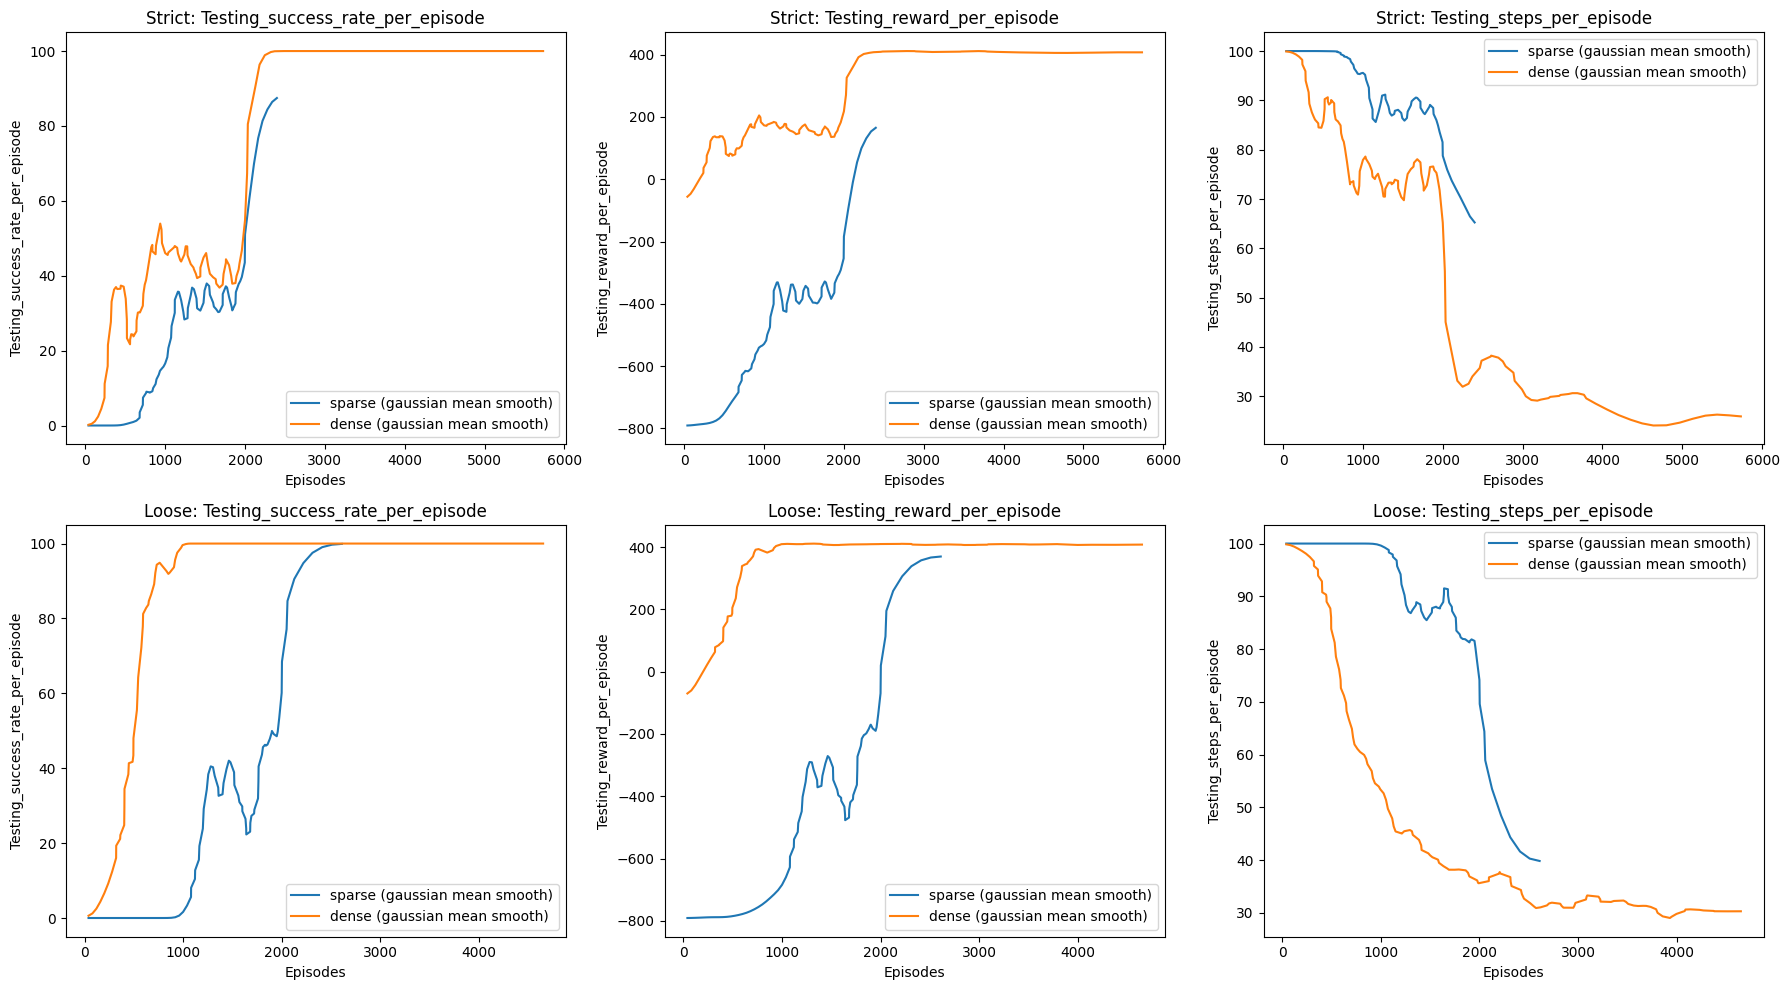

In [6]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

sigma = 2   # Gaussian smooth
metrics = ["Testing_success_rate_per_episode", "Testing_reward_per_episode", "Testing_steps_per_episode"]

fig, axes = plt.subplots(2, 3, figsize=(18,10)) 

# --- Row 1: strict ---
groups = ["sparse", "dense"]
for i, metric in enumerate(metrics):
    ax = axes[0, i]
    for group_name in groups:
        group_df = all_runs_strict[all_runs_strict["run_group"] == group_name]
        mean_per_episode = group_df.groupby("Episodes")[metric].mean()
        smooth_mean = gaussian_filter1d(mean_per_episode.values, sigma=sigma)
        ax.plot(mean_per_episode.index, smooth_mean, label=f"{group_name} (gaussian mean smooth)")
    ax.set_xlabel("Episodes")
    ax.set_ylabel(metric)
    ax.set_title(f"Strict: {metric}")
    ax.legend()

# --- Row 2: loose ---
for i, metric in enumerate(metrics):
    ax = axes[1, i]
    for group_name in groups:
        group_df = all_runs_losse[all_runs_losse["run_group"] == group_name]
        mean_per_episode = group_df.groupby("Episodes")[metric].mean()
        smooth_mean = gaussian_filter1d(mean_per_episode.values, sigma=sigma)
        ax.plot(mean_per_episode.index, smooth_mean, label=f"{group_name} (gaussian mean smooth)")
   
    ax.set_xlabel("Episodes")
    ax.set_ylabel(metric)
    ax.set_title(f"Loose: {metric}")
    ax.legend()

plt.tight_layout()
plt.show()
